<a href="https://colab.research.google.com/github/illusoryTwin/InnoML/blob/main/task2/Task2_test(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Image Classification with CNNs (50%)

In this task, you'll dive into the world of Convolutional Neural Networks (CNNs) by working with the CIFAR-10 dataset, a staple in image classification challenges. Your goal is to build and evaluate two different CNN models to classify images into one of the ten categories accurately.

The dataset is availabel in pytorch and keras.

## Part 1: Custom CNN Model (20%)

- Design and train a CNN model from scratch tailored for the CIFAR-10 dataset.
- Focus on the architecture that you believe will perform best for this specific task.
- Integrate various techniques such as batch normalization, dropout, learning rate schedulers, and early stopping to improve model training. Experiment with these methods and finetune them to see how they affect training stability, convergence speed, and overall performance.

## Part 2: Transfer Learning Model (20%)

- Implement a transfer learning approach using a pre-trained model of your choice.
- Fine-tune the model on the CIFAR-10 dataset to achieve the best possible performance.

## Evaluation (10%)

Ensure that both models are robust and generalized well to unseen data.

After training both models, you will evaluate them on a provided test dataset.

Compare your models based on:
- **AUC-ROC**: How well does each model discriminate between classes?
- **Model Size**: Consider the trade-offs in model complexity.
- **Inference Speed**: Evaluate how quickly your model can predict classes for new images.

Reflect on the performance, size, and inference speed of both models. What insights can you draw from these comparisons?

### Learning Objectives

- Understand and apply CNNs for image classification.
- Explore the impact of model architecture on performance and efficiency.
- Learn the process and benefits of transfer learning in deep learning.

Remember, the key to this task is not just about achieving the highest accuracy but also understanding the strengths and limitations of different approaches in machine learning model development.

## Reference
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp drive/MyDrive/ML/ml_hw/task_2_test_images.npy task_2_test_images.npy
!cp drive/MyDrive/ML/ml_hw/task_2_test_labels.npy task_2_test_labels.npy

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



# 0.75 acc approach

In [48]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values of the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [55]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    width_shift_range=0.1,  # Width shift
    height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    channel_shift_range=0.1,  # Color filtering
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [56]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)


# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=256),
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])



# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


Epoch 1/100
196/196 [==============================] - 42s 196ms/step - loss: 1.7811 - accuracy: 0.4130 - val_loss: 3.9546 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 38s 192ms/step - loss: 1.2392 - accuracy: 0.5680 - val_loss: 2.9958 - val_accuracy: 0.2056 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 38s 191ms/step - loss: 1.0015 - accuracy: 0.6469 - val_loss: 1.0618 - val_accuracy: 0.6415 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 39s 199ms/step - loss: 0.8561 - accuracy: 0.7007 - val_loss: 0.8058 - val_accuracy: 0.7257 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 38s 192ms/step - loss: 0.7645 - accuracy: 0.7307 - val_loss: 0.6736 - val_accuracy: 0.7710 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 38s 195ms/step - loss: 0.7002 - accuracy: 0.7550 - val_loss: 0.7609 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 7/100
196/196 [=========================

In [57]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format (if needed)
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


312/312 [==============================] - 1s 5ms/step - loss: 1.1733 - accuracy: 0.7184
Test loss: 1.173283338546753, Test accuracy: 0.7183607816696167


# Model #1
### Load and preprocess CIFAR-10 data


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Fit the ImageDataGenerator on the training data
datagen.fit(x_train)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/20
  49/1563 [..............................] - ETA: 3:41 - loss: 3.5298 - accuracy: 0.1537

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-24ef23802817>", line 45, in <cell line: 45>
    history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 832, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/ten

TypeError: object of type 'NoneType' has no len()

In [ ]:
import numpy as np

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


# New approach

In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values of the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 6s 0us/step


In [22]:
def apply_channel_switch(image_array):
    # Randomly shuffle the channels (assuming image_array is in RGB format)
    channel_order = np.random.permutation(3)
    return image_array[..., channel_order]

# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    # width_shift_range=0.1,  # Width shift
    # height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    preprocessing_function=apply_channel_switch  # Apply channel switch
)

In [37]:
def apply_blur(image_array):
    # Convert image array to PIL Image
    image = Image.fromarray((image_array * 255).astype(np.uint8))

    # Apply blur
    blurred_image = image.filter(ImageFilter.BLUR)

    # Convert back to numpy array and normalize
    return np.array(blurred_image) / 255.0

# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    # width_shift_range=0.1,  # Width shift
    # height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    preprocessing_function=apply_blur  # Apply channel switch
)


In [31]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image, ImageFilter


# Define custom function for channel switching and blur
def apply_channel_switch_and_blur(image_array):
    # Randomly shuffle the channels (assuming image_array is in RGB format)
    channel_order = np.random.permutation(3)
    image_array = image_array[..., channel_order]

    # Apply blur
    blurred_image = apply_blur(image_array)

    return blurred_image

def apply_blur(image_array):
    # Convert image array to PIL Image
    image = Image.fromarray((image_array * 255).astype(np.uint8))

    # Apply blur
    blurred_image = image.filter(ImageFilter.BLUR)

    # Convert back to numpy array and normalize
    return np.array(blurred_image) / 255.0

# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    # width_shift_range=0.1,  # Width shift
    # height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    preprocessing_function=apply_channel_switch_and_blur  # Apply channel switch and blur
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import ImageDraw

# Custom function to add random points to the image
def add_random_points(image_array):
    image = Image.fromarray((image_array * 255).astype(np.uint8))  # Convert array back to image
    draw = ImageDraw.Draw(image)
    num_points = np.random.randint(10, 20)  # Generate a random number of points to add
    for _ in range(num_points):
        x = np.random.randint(0, image.width)
        y = np.random.randint(0, image.height)
        draw.point((x, y), fill=(np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)))
    return np.array(image) / 255.0  # Convert back to normalized array

# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    # width_shift_range=0.1,  # Width shift
    # height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    preprocessing_function=add_random_points  # Apply custom augmentation
)


In [38]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [20]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def custom_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def custom_color_depletion(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    # width_shift_range=0.1,  # Width shift
    # height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    # channel_shift_range=0.1,  # Color filtering
)


# # Define data augmentation parameters
# datagen = ImageDataGenerator(
#     rotation_range=15,  # Rotation
#     # width_shift_range=0.1,  # Width shift
#     # height_shift_range=0.1,  # Height shift
#     shear_range=0.1,  # Shear transformation
#     zoom_range=0.1,  # Zoom
#     # horizontal_flip=True,  # Horizontal flip
#     # brightness_range=[0.8, 1.2],  # Brightness adjustment
#     # preprocessing_function=lambda img: cv2.cvtColor(cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), (5, 5), 0), cv2.COLOR_BGR2RGB),  # Blur
#     # channel_shift_range=0.1,  # Color filtering
#     # contrast_stretching=True  # Contrast adjustment
# )

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [41]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.1,  # Shear transformation
    rotation_range=15,  # Rotation
    # width_shift_range=0.1,  # Width shift
    # height_shift_range=0.1,  # Height shift
    zoom_range=0.1,  # Zoom
    channel_shift_range=0.1,  # Color filtering
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [46]:
# x_train_augmented = []
# for img in x_train:
#     blurred_img = custom_blur(img)
#     gray_img = custom_color_depletion(blurred_img)
#     x_train_augmented.append(gray_img)

# x_train_augmented = np.array(x_train_augmented)

# Define callbacks

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=256),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])



# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


Epoch 1/20
196/196 [==============================] - 44s 200ms/step - loss: 0.2897 - accuracy: 0.8993 - val_loss: 0.6556 - val_accuracy: 0.8122 - lr: 0.0010
Epoch 2/20
196/196 [==============================] - 37s 190ms/step - loss: 0.2782 - accuracy: 0.9015 - val_loss: 0.5153 - val_accuracy: 0.8420 - lr: 0.0010
Epoch 3/20
196/196 [==============================] - 38s 191ms/step - loss: 0.2650 - accuracy: 0.9052 - val_loss: 0.4937 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 4/20
196/196 [==============================] - 40s 202ms/step - loss: 0.2560 - accuracy: 0.9106 - val_loss: 0.5556 - val_accuracy: 0.8443 - lr: 0.0010
Epoch 5/20
196/196 [==============================] - 37s 188ms/step - loss: 0.2427 - accuracy: 0.9149 - val_loss: 0.5071 - val_accuracy: 0.8513 - lr: 0.0010
Epoch 6/20
196/196 [==============================] - 39s 196ms/step - loss: 0.1765 - accuracy: 0.9378 - val_loss: 0.4096 - val_accuracy: 0.8781 - lr: 2.0000e-04
Epoch 7/20
196/196 [============================

In [47]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format (if needed)
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


312/312 [==============================] - 1s 5ms/step - loss: 1.1000 - accuracy: 0.7504
Test loss: 1.100019931793213, Test accuracy: 0.7504017949104309


In [18]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format (if needed)
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


312/312 [==============================] - 3s 8ms/step - loss: 1.1858 - accuracy: 0.6939
Test loss: 1.1858265399932861, Test accuracy: 0.693852961063385


# Another approach

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


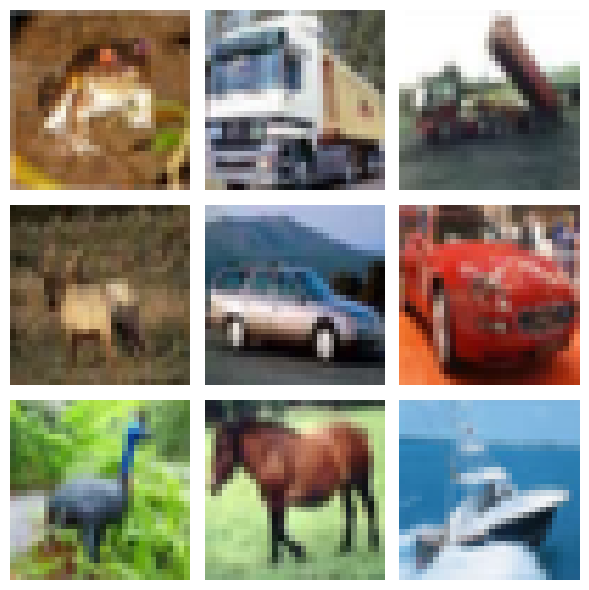

In [ ]:
import matplotlib.pyplot as plt

# Plot some instances of the dataset
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

index = 0
for i in range(3):
    for j in range(3):
        axes[i, j].imshow(x_train[index])
        axes[i, j].axis('off')  # Turn off axis
        index += 1

plt.tight_layout()
plt.show()

## Define the model

In [ ]:
# # Define the model
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.BatchNormalization(),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='softmax')
# ])

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Define the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

Epoch 1/10
391/391 [==============================] - 545s 1s/step - loss: 1.5619 - accuracy: 0.4859 - val_loss: 2.7644 - val_accuracy: 0.2166 - lr: 0.0010
Epoch 2/10
391/391 [==============================] - 543s 1s/step - loss: 1.0078 - accuracy: 0.6472 - val_loss: 0.8753 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 3/10
391/391 [==============================] - 555s 1s/step - loss: 0.8311 - accuracy: 0.7084 - val_loss: 1.0471 - val_accuracy: 0.6393 - lr: 0.0010
Epoch 4/10
391/391 [==============================] - 564s 1s/step - loss: 0.7329 - accuracy: 0.7437 - val_loss: 0.8167 - val_accuracy: 0.7215 - lr: 0.0010
Epoch 5/10
391/391 [==============================] - 564s 1s/step - loss: 0.6527 - accuracy: 0.7725 - val_loss: 0.8080 - val_accuracy: 0.7252 - lr: 0.0010
Epoch 6/10
391/391 [==============================] - 546s 1s/step - loss: 0.5978 - accuracy: 0.7903 - val_loss: 0.7833 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 7/10
391/391 [==============================] - 536s 1s/st

KeyboardInterrupt: 

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format (if needed)
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


312/312 [==============================] - 26s 82ms/step - loss: 1.8493 - accuracy: 0.5434
Test loss: 1.8492951393127441, Test accuracy: 0.5433909296989441


312/312 [==============================] - 28s 88ms/step


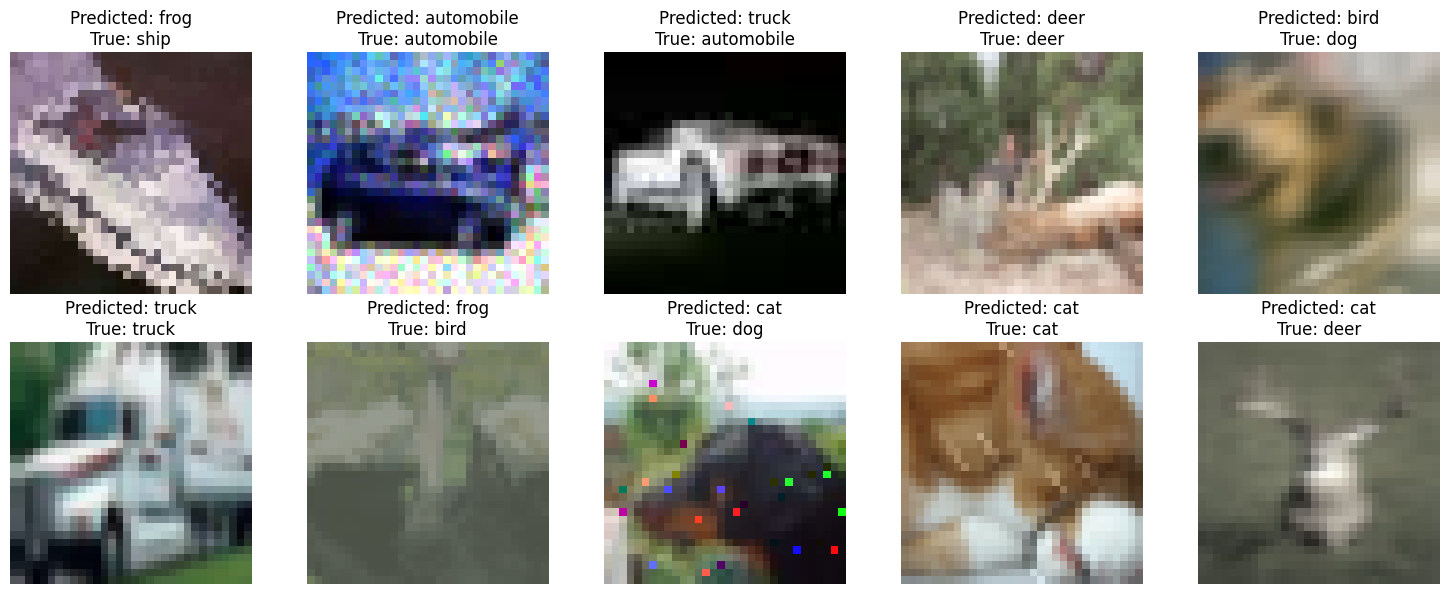

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format (if needed)
test_labels = to_categorical(test_labels, num_classes=10)

# the labels for test images
predictions = model.predict(test_images)

# Visualize the first few images along with their predicted labels
num_images_to_show = 10
plt.figure(figsize=(15, 6))
for i in range(num_images_to_show):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    predicted_label_index = np.argmax(predictions[i])
    true_label_index = np.argmax(test_labels[i])
    predicted_class_name = class_names[predicted_label_index]
    true_class_name = class_names[true_label_index]
    plt.title(f'Predicted: {predicted_class_name}\nTrue: {true_class_name}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

Epoch 1/10
391/391 [==============================] - 9s 19ms/step - loss: 1.9356 - accuracy: 0.3031 - val_loss: 6.7154 - val_accuracy: 0.2347 - lr: 0.0010
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 1.5298 - accuracy: 0.4393 - val_loss: 1.4004 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 1.3414 - accuracy: 0.5140 - val_loss: 1.2044 - val_accuracy: 0.5707 - lr: 0.0010
Epoch 4/10
391/391 [==============================] - 6s 16ms/step - loss: 1.2228 - accuracy: 0.5615 - val_loss: 1.0686 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 1.1393 - accuracy: 0.5924 - val_loss: 1.1530 - val_accuracy: 0.5985 - lr: 0.0010
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 1.0679 - accuracy: 0.6194 - val_loss: 1.0647 - val_accuracy: 0.6493 - lr: 0.0010
Epoch 7/10
391/391 [==============================] - 6s 16ms/st

## Evaluate performance on a test dataset

**Test accuracy: 0.58999598**

In [ ]:
import numpy as np

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


312/312 [==============================] - 1s 4ms/step - loss: 1.3127 - accuracy: 0.5900
Test loss: 1.3127193450927734, Test accuracy: 0.5899959802627563


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest')

datagen.fit(x_train)

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    steps_per_epoch=len(x_train) / 128,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


# Model #2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
X_train  = X_train/255
X_test  = X_test/255

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1),
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 20s 10ms/step - loss: 1.7905 - acc: 0.3362 - val_loss: 1.3920 - val_acc: 0.5043
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3175 - acc: 0.5341 - val_loss: 1.1141 - val_acc: 0.6139
Epoch 3/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1243 - acc: 0.6055 - val_loss: 1.0158 - val_acc: 0.6474
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0032 - acc: 0.6505 - val_loss: 1.0153 - val_acc: 0.6555
Epoch 5/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9253 - acc: 0.6814 - val_loss: 0.9386 - val_acc: 0.6759
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8628 - acc: 0.7010 - val_loss: 0.9079 - val_acc: 0.6824
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8061 - acc: 0.7208 - val_loss: 0.9035 - val_acc: 0.6908
Epoch 8/20
1563/1563 [==============================]

### Evaluate on a test dataset
**Accuracy = 0.56207**

In [ ]:
import numpy as np

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images

test_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])
test_images = test_images.astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)


# Convert test labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

312/312 [==============================] - 2s 6ms/step - loss: 1.4395 - acc: 0.5621
Test loss: 1.439494013786316, Test accuracy: 0.5620731115341187


In [ ]:
# Save the model
model.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format
test_labels = to_categorical(test_labels, num_classes=10)

# Define and compile the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Early stopping callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


Epoch 1/10
1563/1563 [==============================] - 18s 8ms/step - loss: 1.7987 - acc: 0.3240 - val_loss: 1.4214 - val_acc: 0.4728
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3921 - acc: 0.4962 - val_loss: 1.2393 - val_acc: 0.5563
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2268 - acc: 0.5647 - val_loss: 1.1123 - val_acc: 0.6006
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1036 - acc: 0.6114 - val_loss: 1.1107 - val_acc: 0.6126
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0185 - acc: 0.6437 - val_loss: 1.0165 - val_acc: 0.6497
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9497 - acc: 0.6680 - val_loss: 1.0038 - val_acc: 0.6527
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8807 - acc: 0.6949 - val_loss: 0.9645 - val_acc: 0.6671
Epoch 8/10
1563/1563 [==============================] -

InternalError: Graph execution error:

Detected at node sequential_2/conv2d_12/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-26-fd25c2b365ed>", line 43, in <cell line: 43>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Cudnn graph failed to build: UNKNOWN: CUDNN_STATUS_BAD_PARAM
in external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc(4837): 'conv_op' CUDNN_BACKEND_OPERATION: cudnnFinalize Failed
	 [[{{node sequential_2/conv2d_12/Relu}}]] [Op:__inference_test_function_210142]

# Model #3

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


# Plot train and test losses of the classification model
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Test Loss')
plt.title('Classification Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
391/391 [==============================] - 32s 75ms/step - loss: 2.0233 - accuracy: 0.2752 - val_loss: 8.3084 - val_accuracy: 0.1699 - lr: 0.0010
Epoch 2/10
391/391 [==============================] - 31s 80ms/step - loss: 1.7060 - accuracy: 0.3688 - val_loss: 1.4764 - val_accuracy: 0.4530 - lr: 0.0010
Epoch 3/10
391/391 [==============================] - 29s 75ms/step - loss: 1.5522 - accuracy: 0.4277 - val_loss: 1.2529 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 4/10
391/391 [==============================] - 29s 74ms/step - loss: 1.4686 - accuracy: 0.4655 - val_loss: 1.2563 - val_accuracy: 0.5565 - lr: 0.0010
Epoch 5/10
391/391 [==============================] - 29s 74ms/step - loss: 1.4062 - accuracy: 0.4948 - val_loss: 1.2750 - val_accuracy: 0.5665 - lr: 0.0010
Epoch 6/10
391/391 [==============================] - 30s 76ms/step - loss: 1.3736 - accuracy: 0.5102 - val_loss: 1.4388 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 7/10
391/391 [==============================] - 29s 

TypeError: 'History' object is not subscriptable

## Evaluate performance on a test dataset
**Accuracy = 0.53194**

In [ ]:
import numpy as np

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


312/312 [==============================] - 1s 3ms/step - loss: 1.4281 - accuracy: 0.5319
Test loss: 1.4281355142593384, Test accuracy: 0.5319405198097229


In [ ]:
import matplotlib.pyplot as plt

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")


# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot some instances of the test dataset
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

index = 0
for i in range(3):
    for j in range(3):
        axes[i, j].imshow(test_images[index])
        class_label_index = test_labels[index].argmax()  # Get class label index from one-hot encoded label
        class_label = class_labels[class_label_index]  # Map class label index to class label name
        axes[i, j].set_title(class_label)
        axes[i, j].axis('off')  # Turn off axis
        index += 1

plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

In [ ]:
# Save the model
model.save("trained_model.h5")

# RESNET

In [ ]:
# Code is taken from Lab-10

# Source https://github.com/hyunjoonbok/Python-Projects/blob/master/Pytorch/Transfer%20Learning%20in%20Pytorch%20by%20building%20CIFAR-10%20model.ipynb
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models


batch_size = 32


transform = transforms.Compose([
    transforms.Resize((224, 224)), # Input size pretrained model, we have to resize CIFAR images to it
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])

# With no data augmentation, but you can write another transform with
# the methods that we used on lab
train_dataset = datasets.CIFAR10(root='./data', train=True,
                                 transform=transform, download=True)

test_dataset = datasets.CIFAR10(root='./data', train=False,
                                 transform=transform, download=True)


train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          num_workers=2, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                         num_workers=2, shuffle=False)

100%|██████████| 170498071/170498071 [00:13<00:00, 12408096.97it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Set pretrained=True to download weights
model = models.resnet18(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Freezing the layers
for param in model.parameters():
    param.requires_grad = False

# Fine-tuning: replacement of some old layers by the appropriate ones
# Your code here: how to replace the last layer to match CIFAR10?
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes in CIFAR-10 dataset
print(model)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Copy-paste of lab code
from time import time
from tqdm import tqdm


def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    epoch_loss = 0
    start_time = time()
    correct = 0
    iteration = 0

    bar = tqdm(train_loader)
    for data, target in bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output = model(data)
        # Get the index of the max log-probability
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        iteration += 1
        bar.set_postfix({"Loss": format(epoch_loss/iteration, '.6f')})

    acc = 100. * correct / len(train_loader.dataset)
    print(f'\rTrain Epoch: {epoch}, elapsed time:{time()-start_time:.2f}s')
    return epoch_loss, acc


def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    acc = 100. * correct / len(test_loader.dataset)
    return test_loss, acc

In [ ]:
from torch.optim import SGD
from torch.optim import lr_scheduler
from copy import deepcopy

# No need of many epochs
epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.3, patience=2, verbose=True, min_lr=0.0001)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
def training():
    for epoch in range(0, epochs):
        train_loss, train_acc = train(model, device, train_loader, criterion, optimizer, epoch)
        # Update learning rate if needed
        scheduler.step(train_loss)
        test_loss, test_acc = test(model, device, test_loader, criterion)
        print(f"Training accuracy {train_acc}, test accuracy {test_acc}")
        print(f"Training loss {train_loss}, test loss {test_loss}")

    torch.save(model.state_dict(), "model.pt")

training()

  0%|          | 0/1563 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 1563/1563 [01:53<00:00, 13.76it/s, Loss=0.836954]

Train Epoch: 0, elapsed time:113.57s


Training accuracy 72.97, test accuracy 76.58
Training loss 1308.1590604633093, test loss 226.13524375855923


100%|██████████| 1563/1563 [01:49<00:00, 14.28it/s, Loss=0.785773]

Train Epoch: 1, elapsed time:109.46s


Training accuracy 75.534, test accuracy 76.59
Training loss 1228.1624459326267, test loss 246.96948364377022


100%|██████████| 1563/1563 [01:47<00:00, 14.52it/s, Loss=0.774609]

Train Epoch: 2, elapsed time:107.67s


Training accuracy 75.688, test accuracy 76.02
Training loss 1210.714196421206, test loss 257.9259624481201


100%|██████████| 1563/1563 [01:47<00:00, 14.56it/s, Loss=0.760738]

Train Epoch: 3, elapsed time:107.34s


Training accuracy 76.222, test accuracy 75.95
Training loss 1189.0333561897278, test loss 254.9947848394513


100%|██████████| 1563/1563 [01:46<00:00, 14.72it/s, Loss=0.755717]

Train Epoch: 4, elapsed time:106.18s


Training accuracy 76.596, test accuracy 75.48
Training loss 1181.185491234064, test loss 249.34232112020254


100%|██████████| 1563/1563 [01:46<00:00, 14.72it/s, Loss=0.754341]

Train Epoch: 5, elapsed time:106.18s


Training accuracy 76.688, test accuracy 79.33
Training loss 1179.0347883030772, test loss 206.35207129269838


100%|██████████| 1563/1563 [01:46<00:00, 14.62it/s, Loss=0.773912]

Train Epoch: 6, elapsed time:106.92s


Training accuracy 76.466, test accuracy 76.14
Training loss 1209.6247443854809, test loss 252.41866959631443


100%|██████████| 1563/1563 [01:45<00:00, 14.75it/s, Loss=0.780988]

Train Epoch: 7, elapsed time:105.99s


Training accuracy 76.476, test accuracy 76.09
Training loss 1220.6845096051693, test loss 249.30494759976864


100%|██████████| 1563/1563 [01:47<00:00, 14.49it/s, Loss=0.761464]

Train Epoch: 8, elapsed time:107.85s


Training accuracy 76.756, test accuracy 76.12
Training loss 1190.1688045114279, test loss 248.85602164268494


100%|██████████| 1563/1563 [01:46<00:00, 14.67it/s, Loss=0.613168]


Train Epoch: 9, elapsed time:106.57s
Training accuracy 79.722, test accuracy 79.82
Training loss 958.3809955120087, test loss 194.77031594514847


# Evaluate performance on a test dataset

In [ ]:
import numpy as np

# Load test images and labels
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

# Normalize pixel values of test images
test_images = test_images.astype('float32') / 255.0

# Convert test labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')
